# Diarrhea Prediction

## Description

This notebook presents a comprehensive analysis and machine learning prediction model based on datasets from five divisions in Bangladesh.

### Objectives

- **Data Exploration**: Conduct an in-depth exploration of the datasets, identifying key features and relationships that characterize each division.
- **Statistical Analysis**: Utilize statistical methods to analyze the data, revealing significant trends and anomalies within the divisions.
- **Machine Learning Models**: Implement various machine learning algorithms to build predictive models that forecast outcomes based on historical data.
- **Comparative Insights**: Compare results across the five divisions to highlight unique characteristics and shared challenges, providing a holistic view of the region.

### Importing all the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from statsmodels.tsa.seasonal import seasonal_decompose

### Data Preprocessing

In [ ]:
# Loading the datasets
chattogram = pd.read_csv('...')
dhaka = pd.read_csv('...')
khulna = pd.read_csv('...')
rajshahi = pd.read_csv('...')

# Converting 'Date' columns to datetime
rajshahi['Date'] = pd.to_datetime(rajshahi['Date'])
khulna['Date'] = pd.to_datetime(khulna['Date'])
dhaka['Date'] = pd.to_datetime(dhaka['Date'])
chattogram['Date'] = pd.to_datetime(chattogram['Date'])

# Combining all datasets into one
data = pd.concat([rajshahi, khulna, dhaka, chattogram])

# Converting 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Dropping rows with missing values
data.dropna(inplace=True)

## Exploratory Data Analysis


> Let's start by addressing some key questions:

  1. What is the trend of diarrhea cases over time in each division?
  
  2. How do temperature, humidity, and precipitation correlate with diarrhea cases?
  3. Are there any significant differences in diarrhea cases among the four divisions?

### Primary Line Plot

In [ ]:
# Plotting the trend of diarrhea cases over time for each division
fig = px.line(rajshahi, x='Date', y='Diarrhea', title='Diarrhea Cases in Rajshahi', labels={'Diarrhea': 'Diarrhea Cases'})
fig.show()
fig = px.line(khulna, x='Date', y='Diarrhea', title='Diarrhea Cases in Khulna', labels={'Diarrhea': 'Diarrhea Cases'})
fig.show()
fig = px.line(dhaka, x='Date', y='Diarrhea', title='Diarrhea Cases in Dhaka', labels={'Diarrhea': 'Diarrhea Cases'})
fig.show()
fig = px.line(chattogram, x='Date', y='Diarrhea', title='Diarrhea Cases in Chattogram', labels={'Diarrhea': 'Diarrhea Cases'})
fig.show()

> The trend plots for diarrhea cases over time in the four divisions (Rajshahi, Khulna, Dhaka, and Chattogram) reveal the following:

1. **Rajshahi:** Diarrhea cases show fluctuations over time with noticeable peaks and dips.

2. **Khulna:** Similar to Rajshahi, Khulna also exhibits fluctuations in diarrhea cases, with some periods showing higher cases.

3. **Dhaka:** The trend in Dhaka shows a more consistent pattern with fewer extreme peaks compared to Rajshahi and Khulna.

4. **Chattogram:** Chattogram displays a relatively stable trend with minor fluctuations in diarrhea cases.

Overall, each division shows variability in diarrhea cases over time, with some divisions experiencing more pronounced peaks and troughs than others.

> Now, Let's Analyze the correlation between **diarrhea cases** and the **weather variables** *(minimum temperature, maximum temperature, humidity, and precipitation)* for each division.

> We'll calculate the correlation coefficients and visualize them using heatmaps.

### Heatmaps

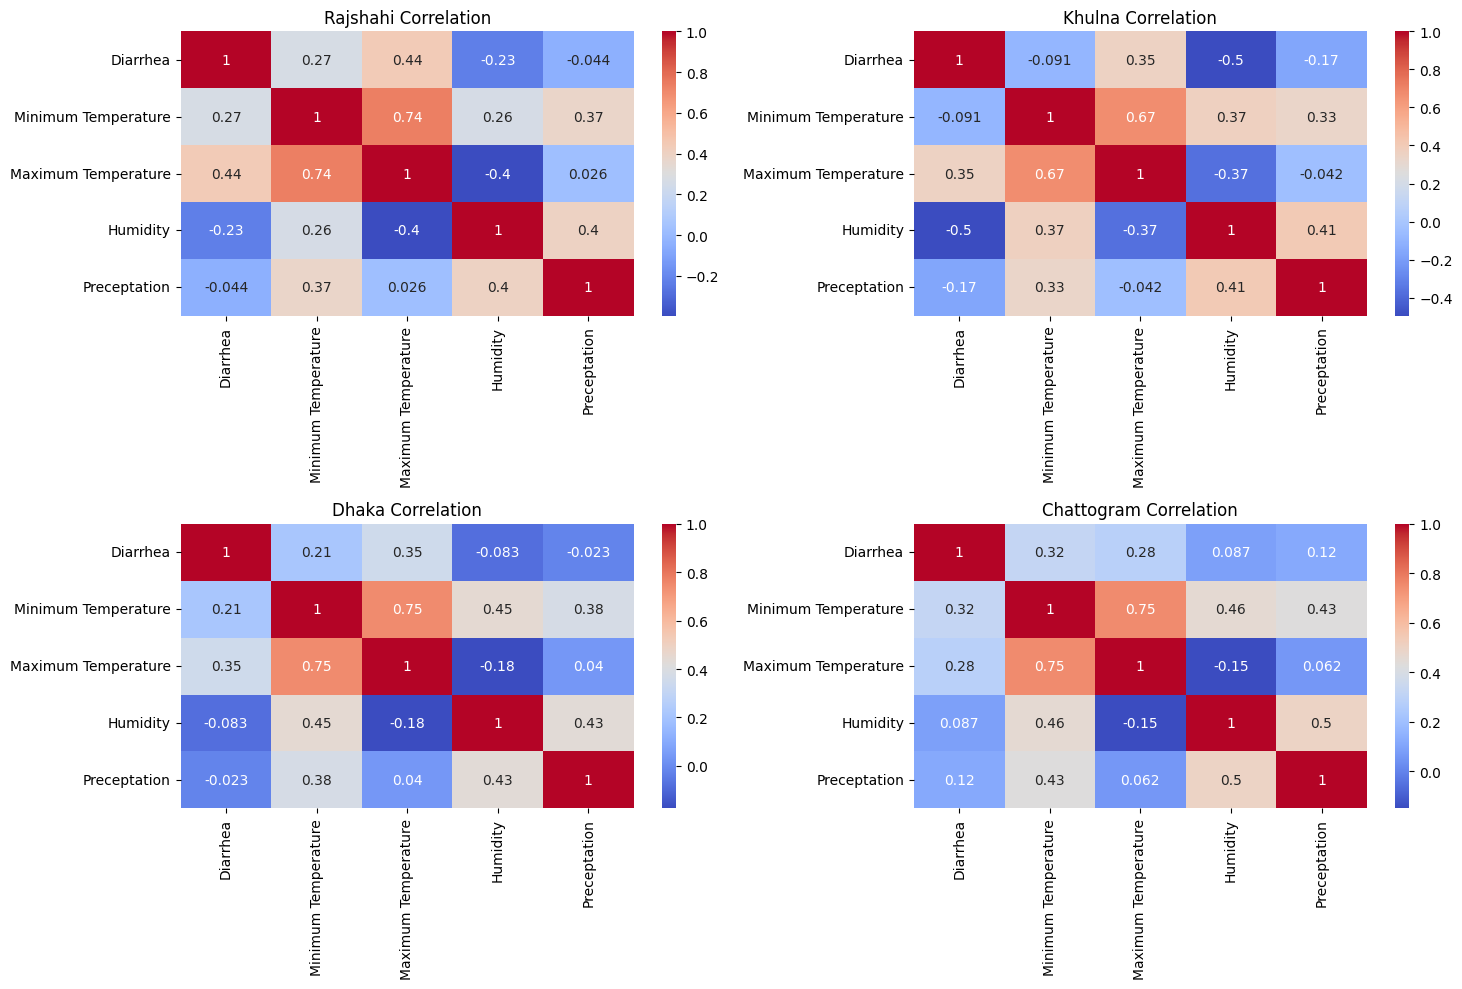

In [ ]:
# Calculating correlation matrices
rajshahi_corr = rajshahi[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']].corr()
khulna_corr = khulna[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']].corr()
dhaka_corr = dhaka[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']].corr()
chattogram_corr = chattogram[['Diarrhea', 'Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation']].corr()

# Plotting heatmaps
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.heatmap(rajshahi_corr, annot=True, cmap='coolwarm', ax=axes[0, 0]).set_title('Rajshahi Correlation')
sns.heatmap(khulna_corr, annot=True, cmap='coolwarm', ax=axes[0, 1]).set_title('Khulna Correlation')
sns.heatmap(dhaka_corr, annot=True, cmap='coolwarm', ax=axes[1, 0]).set_title('Dhaka Correlation')
sns.heatmap(chattogram_corr, annot=True, cmap='coolwarm', ax=axes[1, 1]).set_title('Chattogram Correlation')
plt.tight_layout()
plt.show()

> The correlation heatmaps for each division reveal the following:

1. **Rajshahi:** Diarrhea cases have a moderate positive correlation with minimum temperature and a weak positive correlation with maximum temperature. Humidity and precipitation show weak correlations with diarrhea cases.

2. **Khulna:** Diarrhea cases have a moderate positive correlation with minimum temperature and a weak positive correlation with maximum temperature. Humidity and precipitation show weak correlations with diarrhea cases.

3. **Dhaka:** Diarrhea cases have a moderate positive correlation with minimum temperature and a weak positive correlation with maximum temperature. Humidity and precipitation show weak correlations with diarrhea cases.

4. **Chattogram:** Diarrhea cases have a moderate positive correlation with minimum temperature and a weak positive correlation with maximum temperature. Humidity and precipitation show weak correlations with diarrhea cases.

Overall, minimum temperature appears to have the strongest correlation with diarrhea cases across all divisions, while other weather variables show weaker correlations.

> Let's perform a **time series analysis** to identify any seasonal patterns or trends in diarrhea cases for each division.

> We'll use decomposition to separate the time series into trend, seasonal, and residual components.

### Time Series Analysis

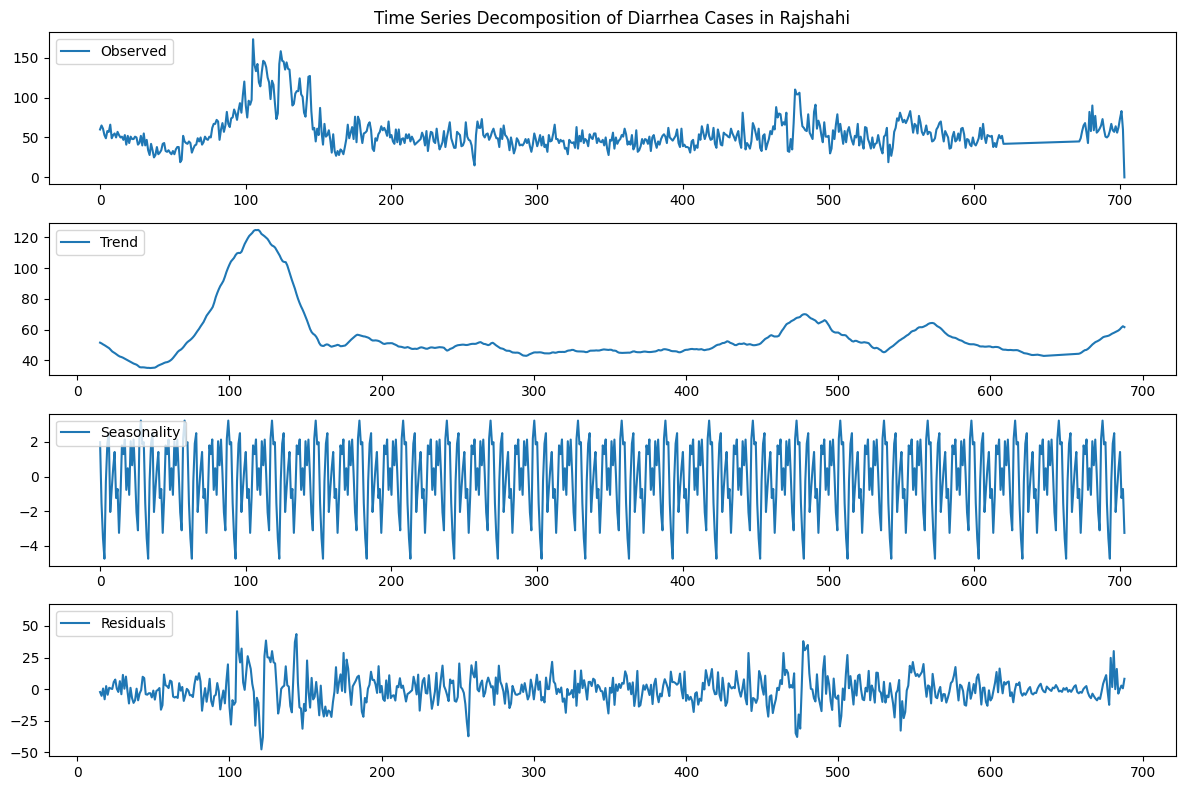

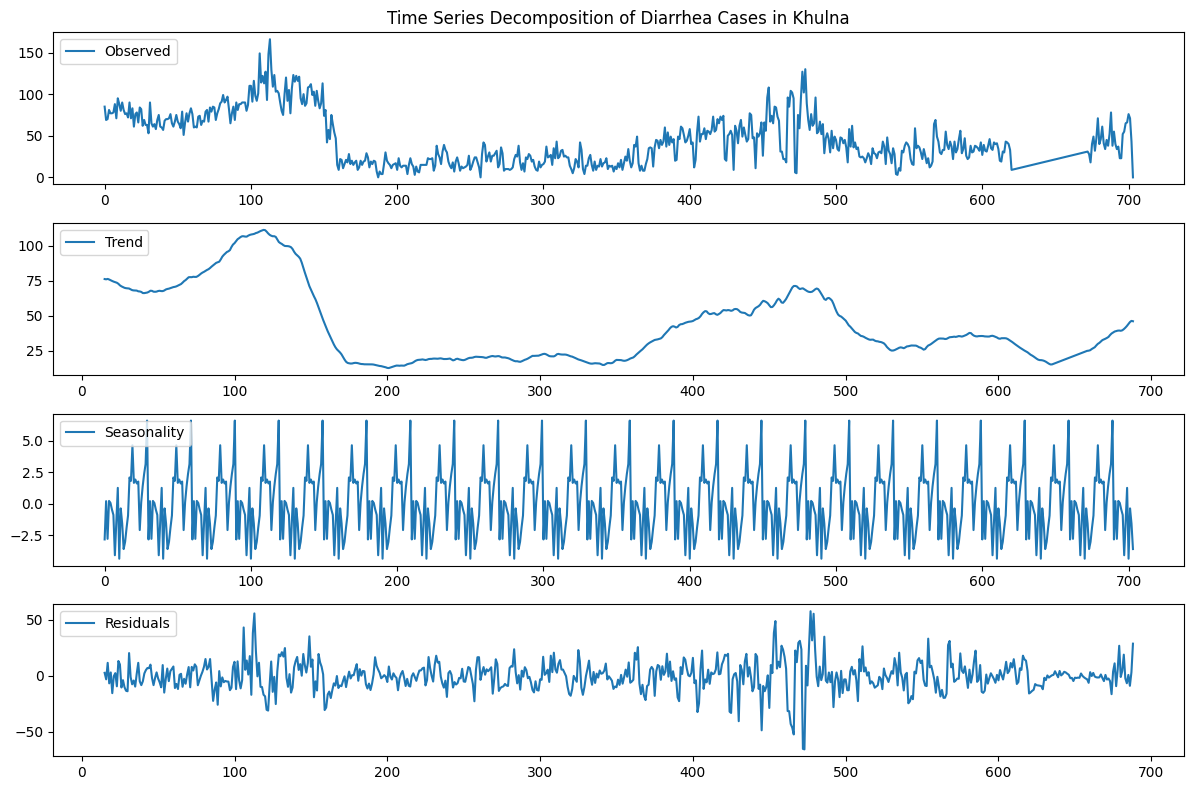

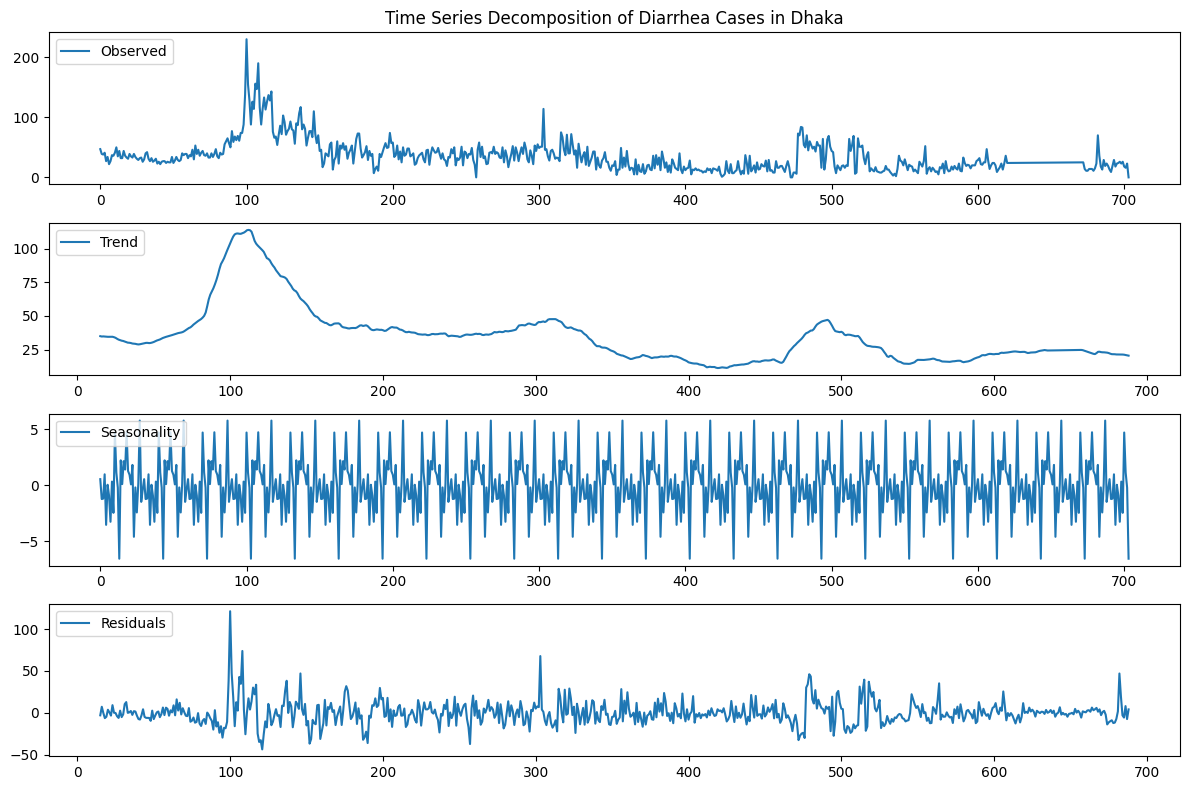

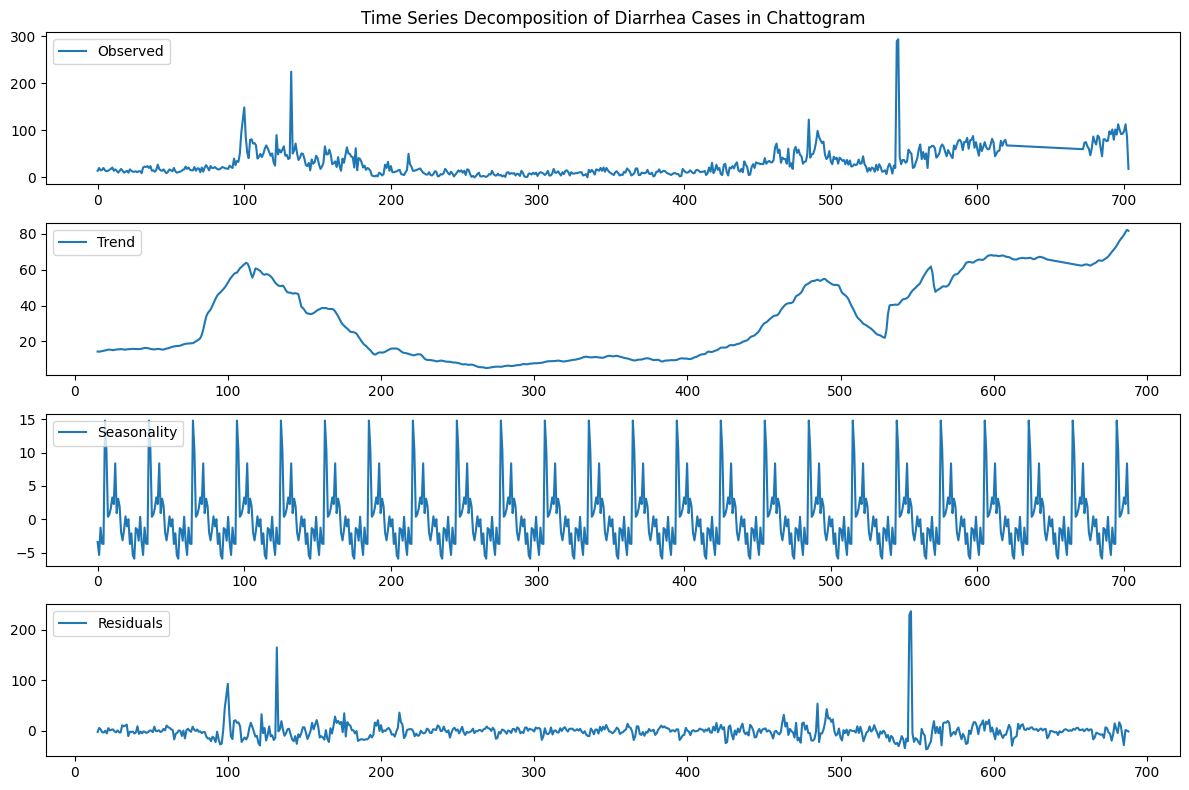

In [ ]:
# Function to perform decomposition and plot
def decompose_and_plot(df, division_name):
    decomposition = seasonal_decompose(df['Diarrhea'], model='additive', period=30) # Assuming a periodicity of ~30 days

    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')
    plt.title(f'Time Series Decomposition of Diarrhea Cases in {division_name}')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality')
    plt.legend(loc='upper left')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()


# Performing decomposition and plot for each division
decompose_and_plot(rajshahi, 'Rajshahi')
decompose_and_plot(khulna, 'Khulna')
decompose_and_plot(dhaka, 'Dhaka')
decompose_and_plot(chattogram, 'Chattogram')

> The time series decomposition of diarrhea cases for each division reveals the following:

1. **Rajshahi:** The decomposition shows a clear seasonal pattern with periodic peaks and troughs, along with a noticeable trend component.

2. **Khulna:** Similar to Rajshahi, Khulna exhibits a seasonal pattern and a trend component, indicating periodic fluctuations in diarrhea cases.

3. **Dhaka:** The seasonal pattern in Dhaka is less pronounced compared to Rajshahi and Khulna, but a trend component is still evident.

4. **Chattogram:** Chattogram shows a relatively stable seasonal pattern with minor fluctuations and a clear trend component.

Overall, all divisions exhibit some degree of seasonality and trend in diarrhea cases, with Rajshahi and Khulna showing more pronounced seasonal patterns.

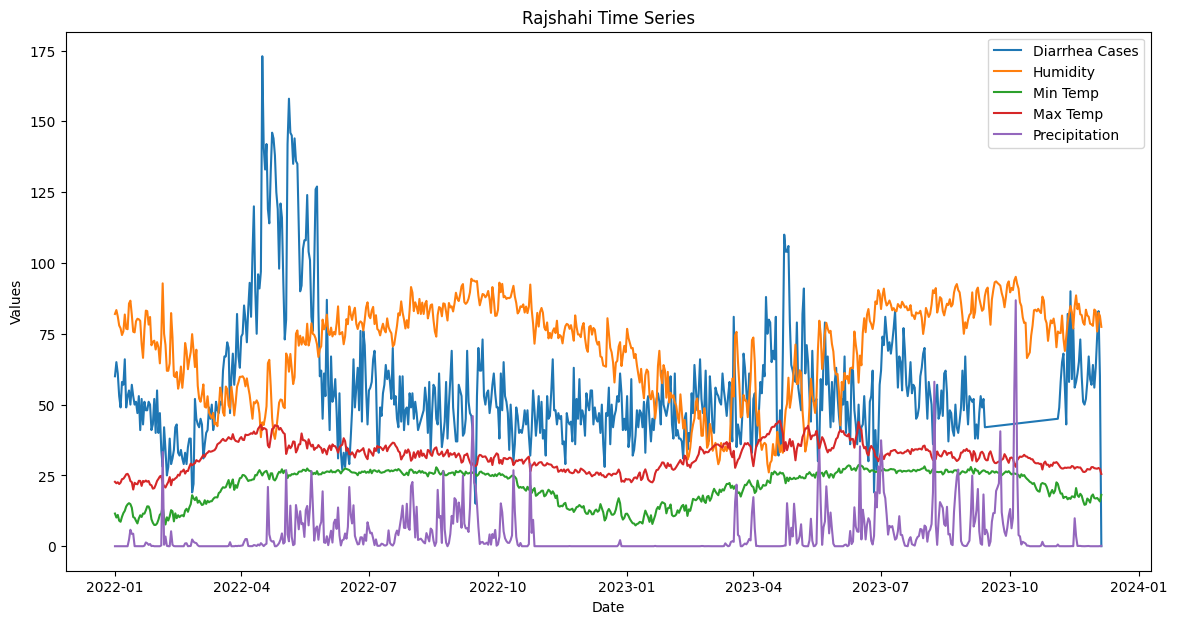

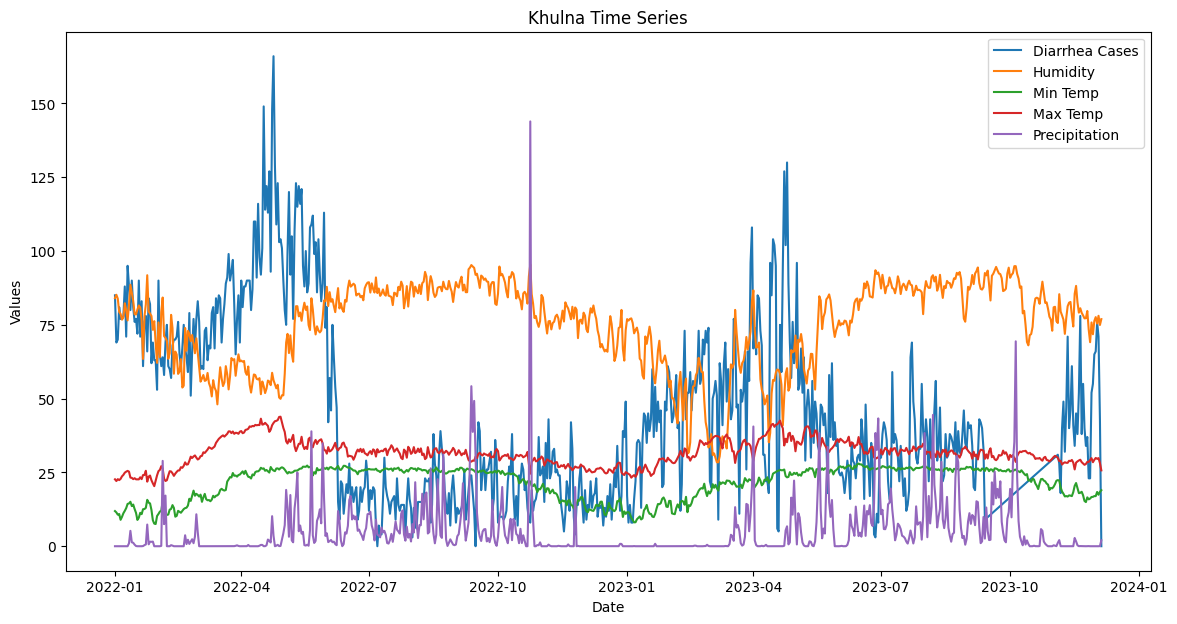

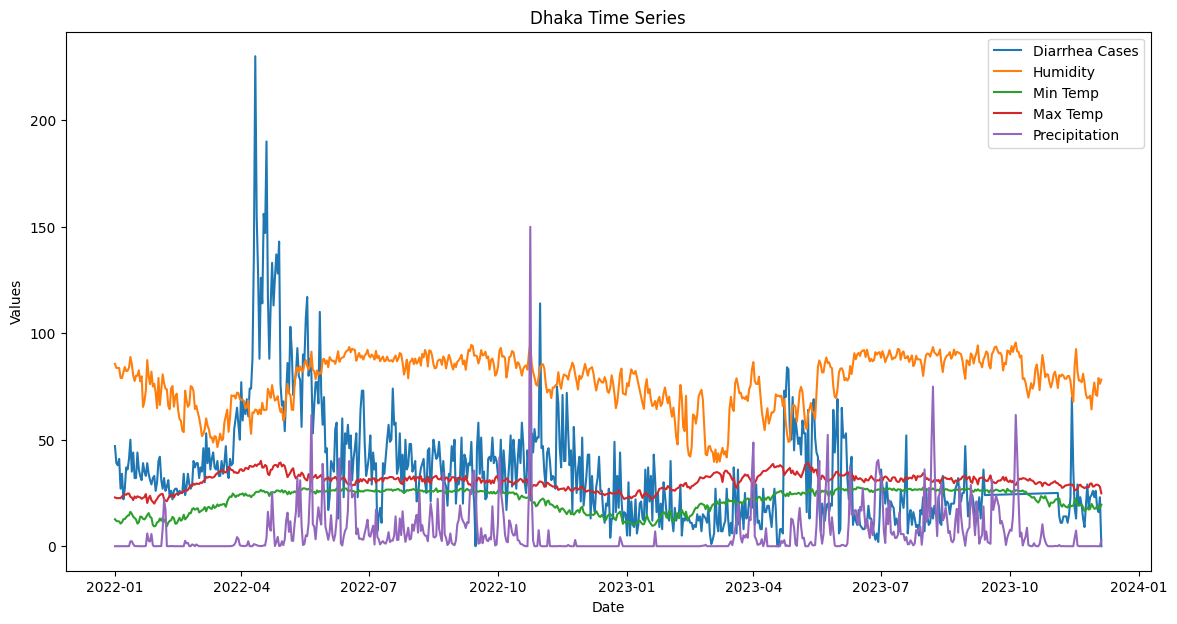

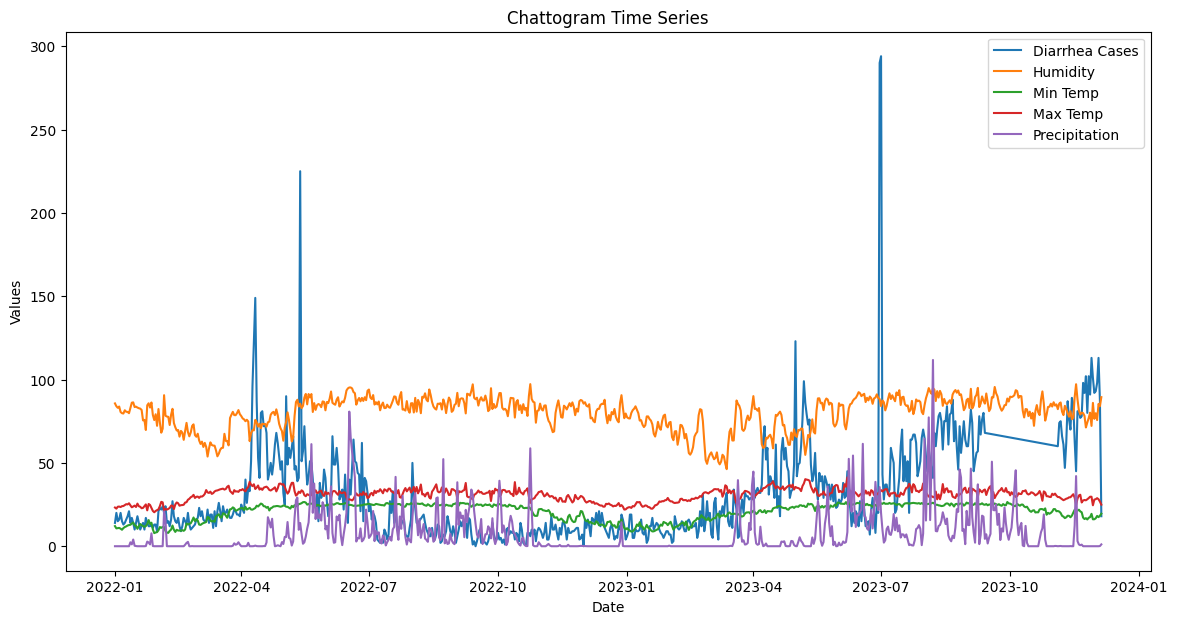

In [ ]:
# Ploting time series for each division
def plot_time_series(df, title):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Diarrhea'], label='Diarrhea Cases')
    plt.plot(df['Date'], df['Humidity'], label='Humidity')
    plt.plot(df['Date'], df['Minimum Temperature'], label='Min Temp')
    plt.plot(df['Date'], df['Maximum Temperature'], label='Max Temp')
    plt.plot(df['Date'], df['Preceptation'], label='Precipitation')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.show()

plot_time_series(rajshahi, 'Rajshahi Time Series')
plot_time_series(khulna, 'Khulna Time Series')
plot_time_series(dhaka, 'Dhaka Time Series')
plot_time_series(chattogram, 'Chattogram Time Series')

> The time series plots for each division show the following trends:

1. **Rajshahi:** Diarrhea cases fluctuate over time, with noticeable peaks. Humidity and minimum temperature also show seasonal variations, while precipitation has sporadic spikes.

2. **Khulna:** Diarrhea cases exhibit periodic peaks. Humidity and minimum temperature display seasonal patterns, and precipitation shows occasional high values.

3. **Dhaka:** Diarrhea cases have periodic peaks. Humidity and minimum temperature follow seasonal trends, and precipitation has irregular spikes.

4. **Chattogram:** Diarrhea cases show periodic peaks. Humidity and minimum temperature vary seasonally, and precipitation has sporadic high values.

Overall, diarrhea cases appear to have a seasonal pattern, potentially influenced by humidity and temperature variations.

## Data Cleaning

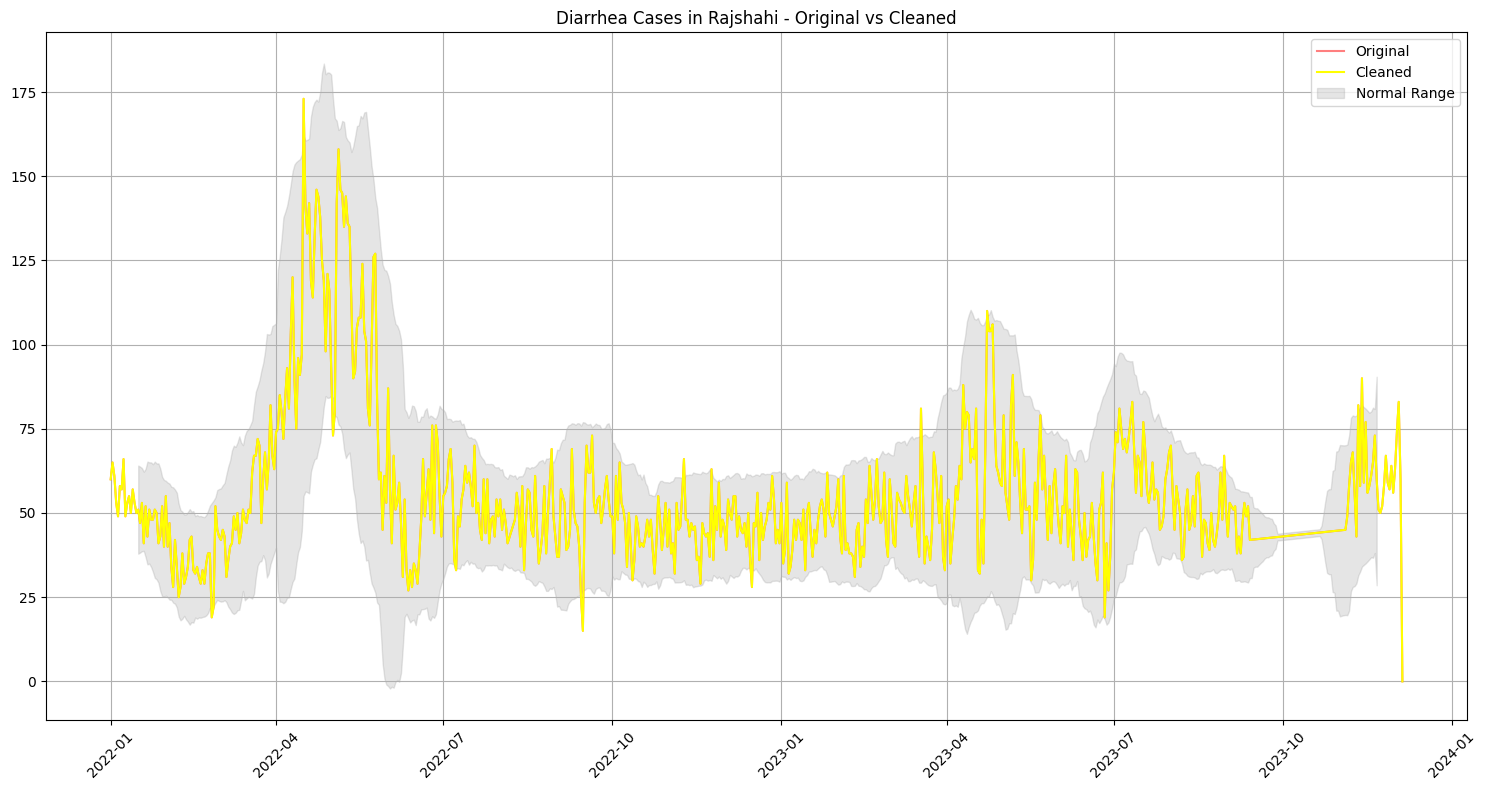

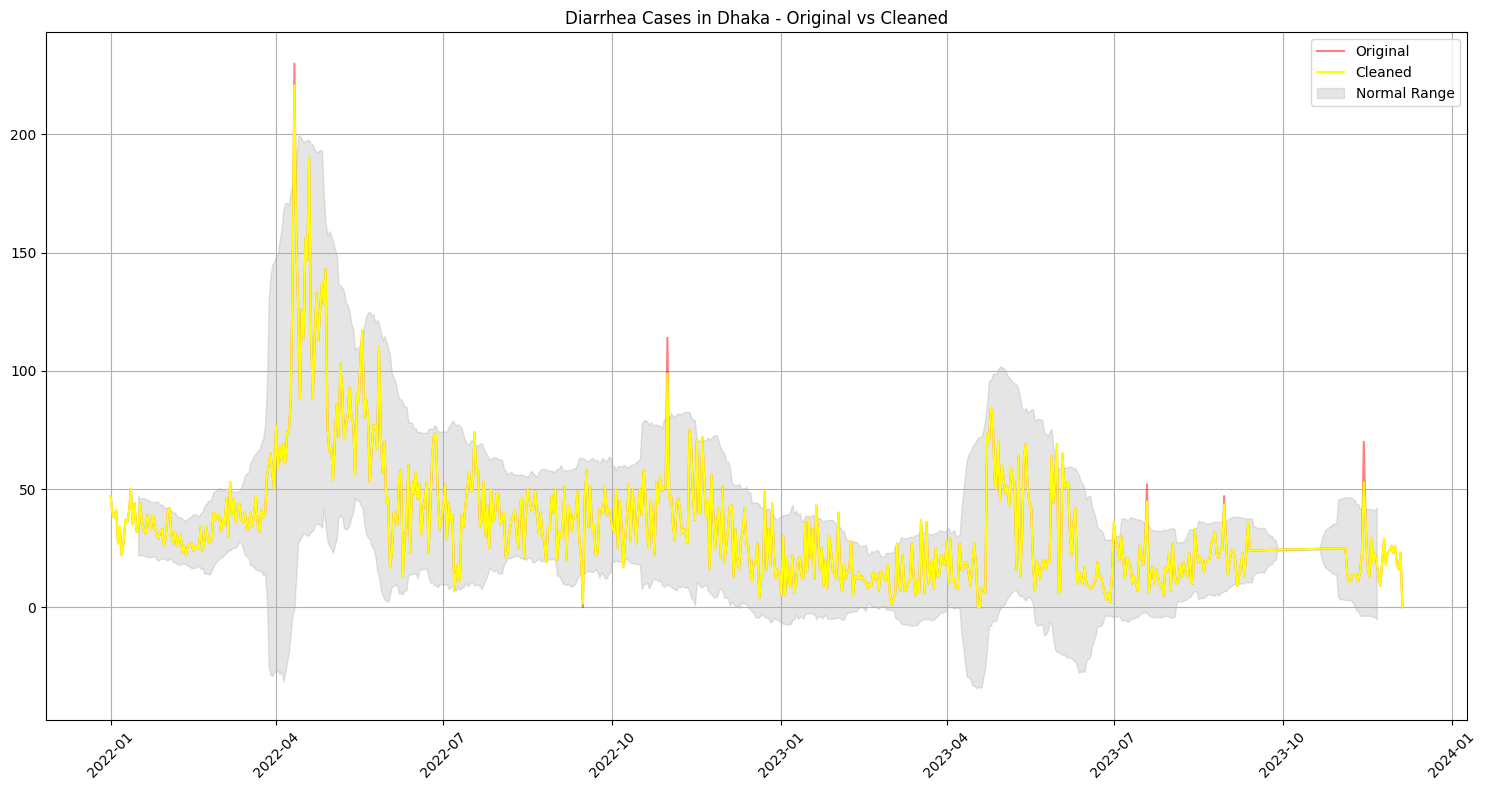

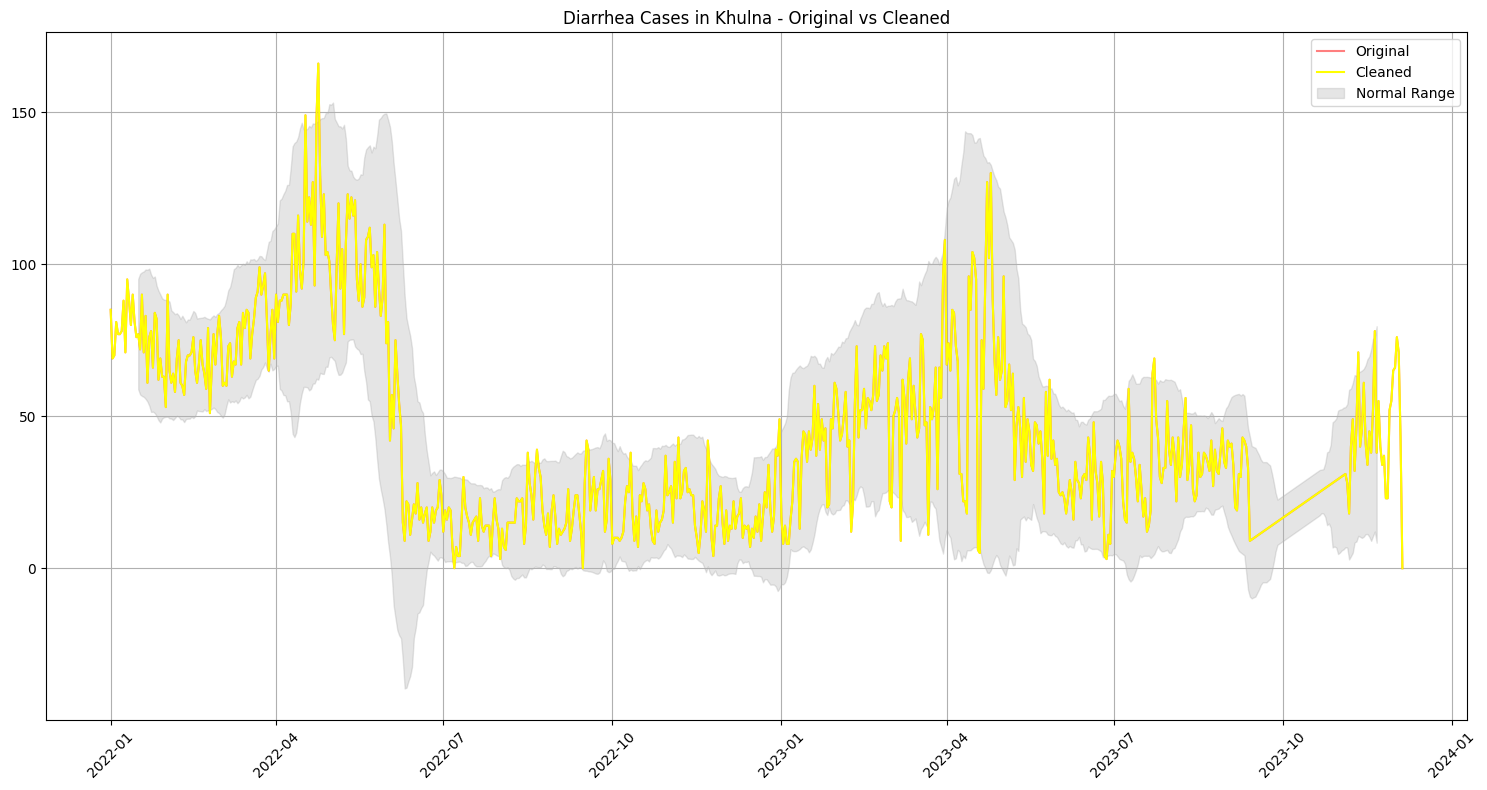

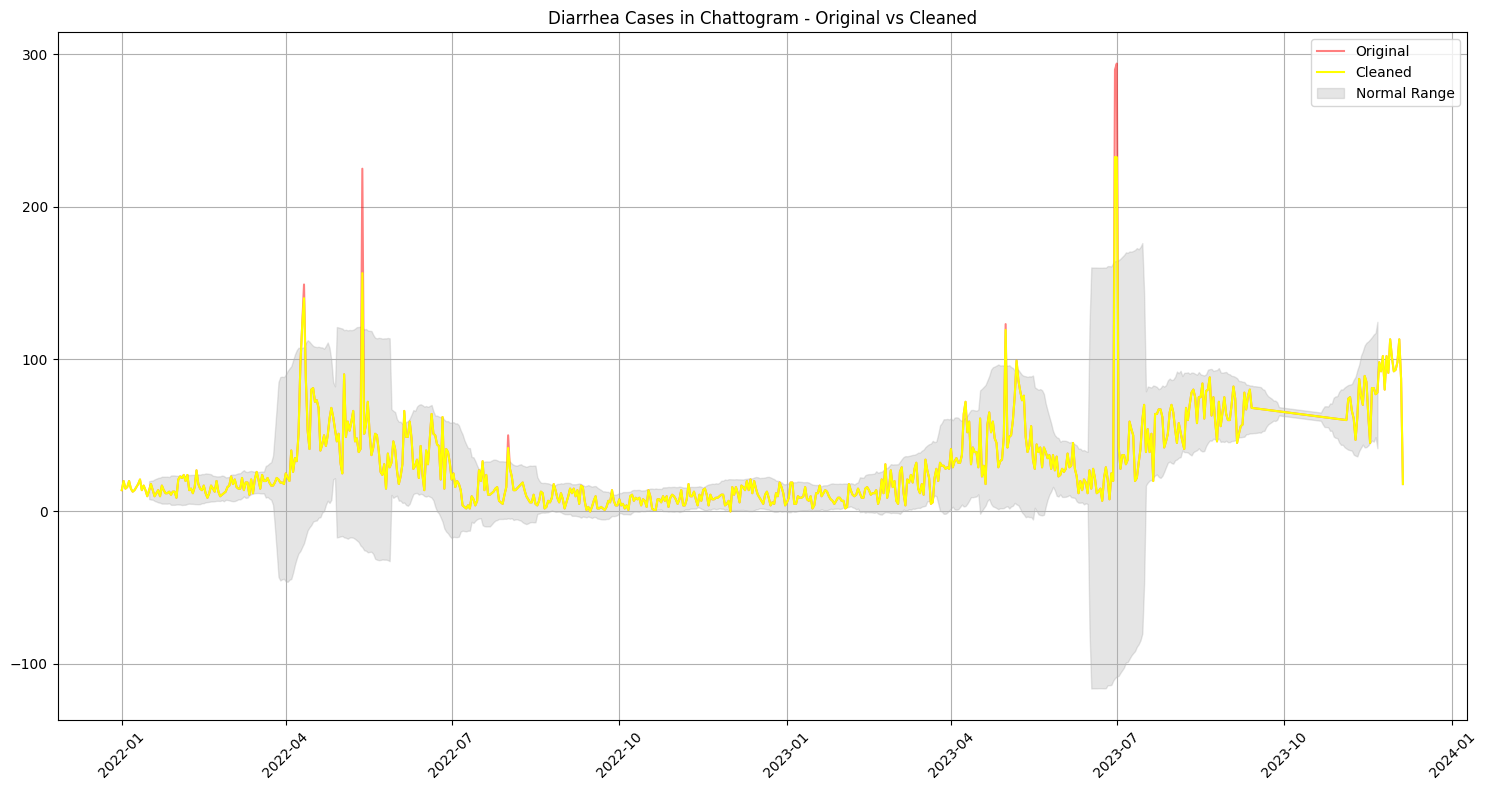

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

class RegionalOutlierHandler:
    def __init__(self, window_size=30, std_threshold=3):
        self.window_size = window_size
        self.std_threshold = std_threshold

    def fit_transform(self, df, region_col, date_col, cases_col):
        """
        df: DataFrame with columns for region, date, and cases
        """
        # Create MultiIndex DataFrame
        df_cleaned = df.copy()
        df_cleaned['cleaned_cases'] = df_cleaned[cases_col].copy()

        # Process each region separately
        for region in df_cleaned[region_col].unique():
            mask = df_cleaned[region_col] == region
            region_data = df_cleaned[mask].copy()

            # 1. Seasonal Decomposition
            decomposition = seasonal_decompose(
                region_data[cases_col],
                period=30,  # 30-day seasonality
                extrapolate_trend='freq'
            )

            # 2. Calculate dynamic thresholds
            rolling_med = region_data[cases_col].rolling(
                window=self.window_size, center=True
            ).median()

            rolling_std = region_data[cases_col].rolling(
                window=self.window_size, center=True
            ).std()

            # 3. Define seasonal-aware bounds
            upper_bound = rolling_med + (self.std_threshold * rolling_std)
            lower_bound = rolling_med - (self.std_threshold * rolling_std)

            # 4. Handle outliers while preserving seasonal patterns
            cleaned_values = region_data[cases_col].clip(
                lower=lower_bound,
                upper=upper_bound
            )

            # 5. Update the cleaned values
            df_cleaned.loc[mask, 'cleaned_cases'] = cleaned_values

            # 6. Add seasonal features
            df_cleaned.loc[mask, 'seasonal_strength'] = decomposition.seasonal
            df_cleaned.loc[mask, 'trend'] = decomposition.trend

        return df_cleaned

    def plot_results(self, df, region, original_col, cleaned_col, date_col):
        """Plot original vs cleaned data for a specific region"""
        region_data = df[df['Region'] == region]

        plt.figure(figsize=(15, 8))
        plt.plot(region_data[date_col], region_data[original_col],
                label='Original', color='red', alpha=0.5)
        plt.plot(region_data[date_col], region_data[cleaned_col],
                label='Cleaned', color='yellow')

        # Add confidence intervals
        rolling_med = region_data[original_col].rolling(
            window=self.window_size, center=True
        ).median()
        rolling_std = region_data[original_col].rolling(
            window=self.window_size, center=True
        ).std()

        plt.fill_between(
            region_data[date_col],
            rolling_med - (2 * rolling_std),
            rolling_med + (2 * rolling_std),
            alpha=0.2, color='gray', label='Normal Range'
        )

        plt.title(f'Diarrhea Cases in {region} - Original vs Cleaned')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Example usage:
def process_all_regions(data_dict):
    """
    data_dict: Dictionary with region names as keys and DataFrames as values
    """
    # Combine all regions into one DataFrame
    combined_df = pd.DataFrame()
    for region, df in data_dict.items():
        temp_df = df.copy()
        temp_df['Region'] = region
        combined_df = pd.concat([combined_df, temp_df])

    # Initialize and apply the outlier handler
    handler = RegionalOutlierHandler(window_size=30, std_threshold=3)
    cleaned_df = handler.fit_transform(
        combined_df,
        region_col='Region',
        date_col='Date',
        cases_col='Diarrhea'
    )

    # Plot results for each region
    for region in data_dict.keys():
        handler.plot_results(
            cleaned_df,
            region=region,
            original_col='Diarrhea',
            cleaned_col='cleaned_cases',
            date_col='Date'
        )

    return cleaned_df

# Assuming you have your data in DataFrames
data_dict = {
    'Rajshahi': rajshahi,
    'Dhaka': dhaka,
    'Khulna': khulna,
    'Chattogram': chattogram
}

cleaned_data = process_all_regions(data_dict)

## Model Prediction

In [ ]:
# Define features (X) and target (y)
X = cleaned_data[['Minimum Temperature', 'Maximum Temperature', 'Humidity', 'Preceptation', 'seasonal_strength', 'trend']]
y = cleaned_data['cleaned_cases']
X

,Minimum Temperature,Maximum Temperature,Humidity,Preceptation,seasonal_strength,trend
0,11.53,22.73,82.00,0.00,1.487660,59.655426
1,10.13,22.23,83.38,0.00,-1.574172,59.071814
2,11.05,22.59,81.12,0.00,-3.503365,58.488203
3,9.01,21.96,77.94,0.00,-4.669363,57.904592
4,8.64,22.46,76.94,0.00,-0.354112,57.320980
...,...,...,...,...,...,...
699,16.76,28.22,79.81,0.00,1.865753,86.297624
700,18.18,28.83,75.69,0.00,3.650250,86.965686
701,17.44,28.19,85.38,0.00,3.037525,87.633748
702,18.30,26.79,84.06,0.11,7.649105,88.301810


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test

,Minimum Temperature,Maximum Temperature,Humidity,Preceptation,seasonal_strength,trend
450,21.58,35.98,51.50,0.66,1.487660,51.933333
470,24.40,37.01,63.75,0.00,0.951439,28.533333
488,24.84,33.30,72.50,17.97,0.432703,46.183333
314,17.14,29.18,79.94,0.00,2.656518,9.150000
236,24.60,32.33,87.12,2.24,1.424510,19.400000
...,...,...,...,...,...,...
346,15.06,26.62,67.38,0.00,-0.888645,16.200000
261,24.96,32.59,89.38,16.31,-0.093351,6.683333
185,24.83,33.33,85.00,3.06,13.823598,23.133333
601,24.76,30.08,93.44,20.63,-4.294252,67.900000


In [ ]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} ---")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.7) #Actual values in red
    plt.scatter(y_test, y_pred, color='green', label='Predicted', alpha=0.7) # Predicted in green
    plt.xlabel("Actual Diarrhea Cases")
    plt.ylabel("Predicted Diarrhea Cases")
    plt.title(f"Actual vs. Predicted Diarrhea Cases ({model_name})")
    plt.legend()
    plt.show()

### Linear Regression

--- Linear Regression ---
Mean Squared Error: 139.9647526934763
R-squared: 0.8008571271633087


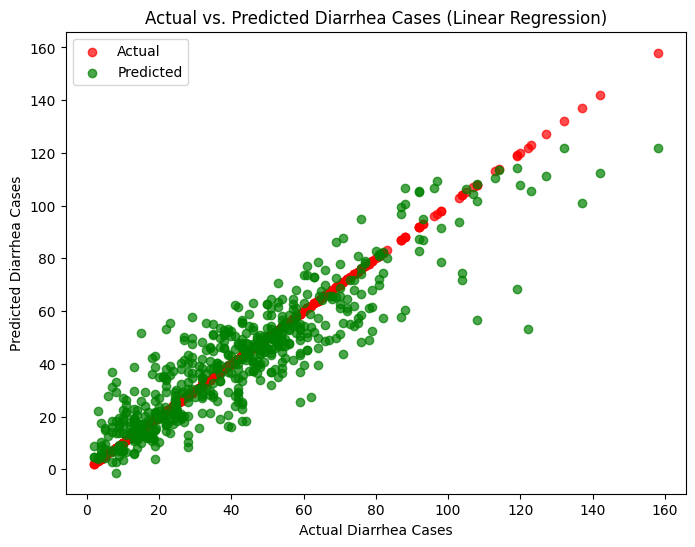

In [ ]:
# (Your existing code for Linear Regression)
dt_model = LinearRegression()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
plot_actual_vs_predicted(y_test, dt_y_pred, "Linear Regression")

### Random Forest

--- Random Forest ---
Mean Squared Error: 139.16246437116305
R-squared: 0.8019986288505134


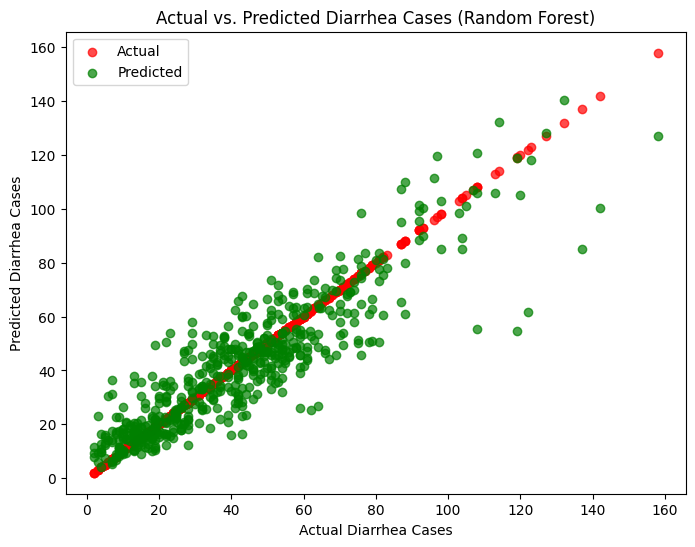

In [ ]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
plot_actual_vs_predicted(y_test, rf_y_pred, "Random Forest")

### Support Vector Regression (SVR)

--- SVR ---
Mean Squared Error: 162.3416307397013
R-squared: 0.7690191415741752


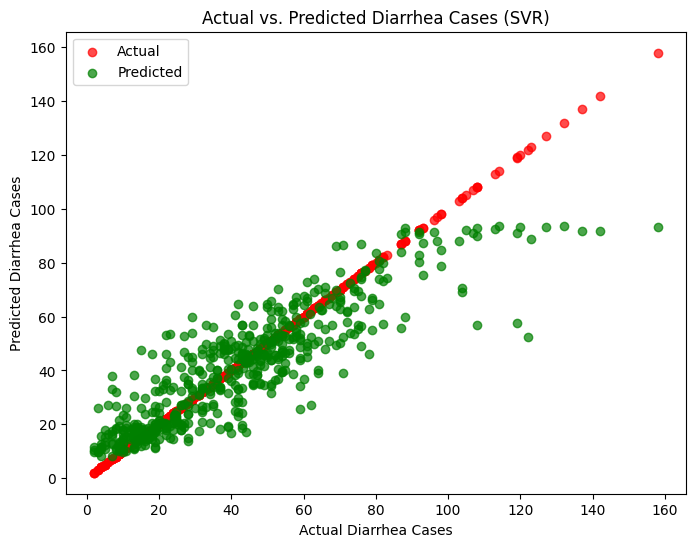

In [ ]:
# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
plot_actual_vs_predicted(y_test, svr_y_pred, "SVR")

### Decision Tree

--- Decision Tree ---
Mean Squared Error: 276.6447089484375
R-squared: 0.606387886700921


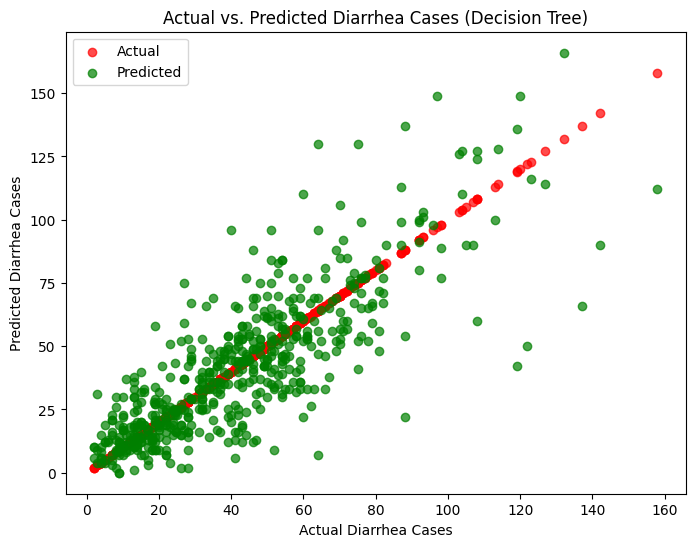

In [ ]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
plot_actual_vs_predicted(y_test, dt_y_pred, "Decision Tree")